# 匯入檔案

In [1]:
path = "/Users/boyen/Downloads/newn/"
# /Users/boyen/Downloads/newn/aftertokwholewithsenti.csv

In [2]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

In [3]:
# /Users/boyen/Downloads/newdata0103/aftertokwholewithsenti.csv
df = pd.read_csv("/Users/boyen/Downloads/newn/aftertokwholewithsenti.csv")  
df

,歌名,歌手,周排名,周數,token,情緒
0,Kiss Goodbye,王力宏,1,2006w1,不要 再 哭泣 這幕 多麼 熟悉 緊握著 手 彼此 都 捨不得 分離 每次 想 開口 但 不...,Negative
1,我會好好的,王心凌,2,2006w1,花還 香香的 時間 直去 回憶 真 美麗 想著 你 直 想著 你 你在 我 心底 變成 秘密...,Positive
2,睫毛彎彎,王心凌,3,2006w1,我心 蹦蹦跳跳 靈魂 快要 出竅 這 感覺 真好 你 對著 我 微笑 溫度 越來越 高 怎麼...,Positive
3,彩虹天堂,劉畊宏,4,2006w1,我 不知不覺 又 徘徊 在 從前 秋風 悄悄的 呼喚 聽來 盡是 孤單 落葉 期盼 片片 左...,Negative
4,花田錯,王力宏,5,2006w1,夜 好深 紙窗 裏 亮著 那 徹夜 等候 你 為我 點的 燭火 不過 是次 邂逅 紅樓 那場...,Negative
...,...,...,...,...,...,...
36388,兵變,"邱鋒澤, 陳零九, 黃偉晉 & 小賴",46,2019w52,那年 秋天 你在 月台 叫我 要 加油 飄忽 眼神 以為是 不捨 稀鬆 始末 早已 安排 在...,Negative
36389,Love is Love,楊丞琳 (Rainie Yang),47,2019w52,是不是 我 太 單純 壞 好 崇拜 想得到 他 完整的 愛但 沒 簡單 頭髮 留長 放下來 ...,Netural
36390,再見煙火 (Goodbye Firework),卓義峯 (Yifeng Zhuo),48,2019w52,你 不敢 看我 更讓 我 難過 沉默 在 他們 放的 煙火 我 就像 煙火 瘋狂 燃燒 還是...,Negative
36391,告白氣球,周杰倫 (Jay Chou),49,2019w52,塞納河畔 左岸 咖啡 我 手杯 品嚐 美 留下 唇 印的 嘴 花店 玫瑰 名字 寫錯 誰 風...,Positive


# 定義不重複歌曲的正負向分析

In [4]:
def pos_len(x):
    ydata = df[df.周數.str.startswith(x)]
    ydata=ydata[ydata.columns[[0,1,4,5]]]
    ydata = ydata.drop_duplicates().reset_index()
    posdata = ydata[ydata['情緒']=='Positive']
    ans = len(posdata)
    return ans

def neg_len(x):
    ydata = df[df.周數.str.startswith(x)]
    ydata=ydata[ydata.columns[[0,1,4,5]]]
    ydata = ydata.drop_duplicates().reset_index()
    posdata = ydata[ydata['情緒']=='Negative']
    ans = len(posdata)
    return ans

def net_len(x):
    ydata = df[df.周數.str.startswith(x)]
    ydata=ydata[ydata.columns[[0,1,4,5]]]
    ydata = ydata.drop_duplicates().reset_index()
    posdata = ydata[ydata['情緒']=='Netural']
    ans = len(posdata)
    return ans
    

In [5]:
year_pos_len = [ ]
year_neg_len = [ ]
year_net_len = [ ]


for i in range(2006, 2020):
    
    i = str(i)
    yp = pos_len(i)
    yn = neg_len(i)
    ynn = net_len(i)
    year_pos_len.append(yp)
    year_neg_len.append(yn)
    year_net_len.append(ynn)
    
    
    
print(year_pos_len)
print(year_neg_len)
print(year_net_len)

[116, 108, 102, 96, 76, 49, 39, 36, 40, 28, 36, 42, 47, 41]
[268, 244, 258, 259, 244, 211, 139, 149, 173, 151, 130, 171, 176, 183]
[40, 35, 20, 35, 22, 26, 18, 11, 13, 20, 15, 19, 14, 23]


In [6]:
len(year_net_len)

14

In [7]:
year_pos_len = [210, 189, 174, 174, 135, 116, 84, 80, 95, 84, 78, 89, 89, 101]
year_neg_len = [186, 172, 175, 189, 183, 150, 97, 103, 111, 97, 92, 124, 131, 129]
year_net_len = [40, 35, 20, 35, 22, 26, 18, 11, 13, 20, 15, 19, 14, 23]

In [8]:
data = list(zip(year_pos_len, year_neg_len, year_net_len))
df_pic = pd.DataFrame(data, columns = ["pos", "neg", "net"])

In [9]:
df_pic

,pos,neg,net
0,210,186,40
1,189,172,35
2,174,175,20
3,174,189,35
4,135,183,22
5,116,150,26
6,84,97,18
7,80,103,11
8,95,111,13
9,84,97,20


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 直接繪圖，毋須 plot.show()
%matplotlib inline  

# 畫圖

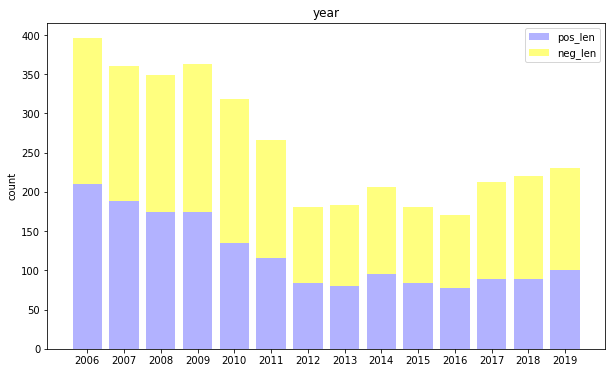

In [14]:
N = len(year_pos_len)           # 柱子的個數
ind = np.arange(N)    # 柱子的中心點位置
width = 0.8           # 柱子的寬度

plt.figure(figsize=(10,6))    # 圖區大小
# c1, c2 c3 為變數值，前已設定，alpha為透明度，color 為顏色，bottom 為柱子的啟始點
p1 = plt.bar(ind, year_pos_len, width, alpha = 0.3, color = 'blue' )   # p1 最下面
p2 = plt.bar(ind, year_neg_len, width, bottom = year_pos_len, alpha = 0.5, color = 'yellow' )   # 在 c1 值上面疊加
#p3 = plt.bar(ind, year_net_len, width, bottom = year_pos_len + year_neg_len, alpha=0.5,color='green' ) 
#p3 = plt.bar(ind, year_net_len, width, bottom = year_neg_len + year_pos_len  , alpha = 0.6, color = 'green' )

#p1 = plt.bar(ind, c1, width, alpha=0.3, color='blue' )   # p1 最下面
#p2 = plt.bar(ind, c2, width, bottom=c1, alpha=0.5,color='yellow' )   # 在 c1 值上面疊加
#p3 = plt.bar(ind, c3, width, bottom=c1+c2, alpha=0.5,color='green' )  # 在 c1+c2 值上面疊加



plt.ylabel('count')    # 縱軸文字
plt.title('year')   # 標題
x = range(14)
new_year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
plt.xticks(x, new_year)   # 橫軸刻度標籤
plt.legend((p1[0], p2[0]), ('pos_len', 'neg_len'))    # 圖例

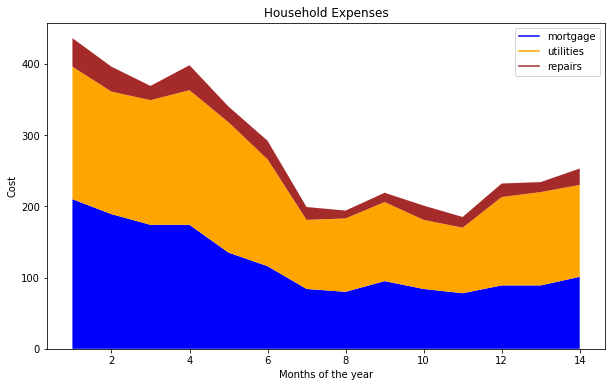

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))  

months= [x for x in range(1,15)]

mortgage= [210, 189, 174, 174, 135, 116, 84, 80, 95, 84, 78, 89, 89, 101]

utilities= [186, 172, 175, 189, 183, 150, 97, 103, 111, 97, 92, 124, 131, 129]

repairs= [40, 35, 20, 35, 22, 26, 18, 11, 13, 20, 15, 19, 14, 23]
#year_pos_len = [210, 189, 174, 174, 135, 116, 84, 80, 95, 84, 78, 89, 89, 101]
#year_neg_len = [186, 172, 175, 189, 183, 150, 97, 103, 111, 97, 92, 124, 131, 129]
#year_net_len = [40, 35, 20, 35, 22, 26, 18, 11, 13, 20, 15, 19, 14, 23]

plt.plot([],[], color='blue', label='mortgage')
plt.plot([],[], color='orange', label='utilities')
plt.plot([],[], color='brown', label='repairs')


plt.stackplot(months, mortgage, utilities, repairs, colors=['blue', 'orange', 'brown'])

plt.legend()

x = range(14)
new_year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.title('Household Expenses')
plt.xlabel('Months of the year')
plt.ylabel('Cost')

plt.show()

# 開始分析重複歌曲3萬多首

In [16]:
df["token"]

0        不要 再 哭泣 這幕 多麼 熟悉 緊握著 手 彼此 都 捨不得 分離 每次 想 開口 但 不...
1        花還 香香的 時間 直去 回憶 真 美麗 想著 你 直 想著 你 你在 我 心底 變成 秘密...
2        我心 蹦蹦跳跳 靈魂 快要 出竅 這 感覺 真好 你 對著 我 微笑 溫度 越來越 高 怎麼...
3        我 不知不覺 又 徘徊 在 從前 秋風 悄悄的 呼喚 聽來 盡是 孤單 落葉 期盼 片片 左...
4        夜 好深 紙窗 裏 亮著 那 徹夜 等候 你 為我 點的 燭火 不過 是次 邂逅 紅樓 那場...
                               ...                        
36388    那年 秋天 你在 月台 叫我 要 加油 飄忽 眼神 以為是 不捨 稀鬆 始末 早已 安排 在...
36389    是不是 我 太 單純 壞 好 崇拜 想得到 他 完整的 愛但 沒 簡單 頭髮 留長 放下來 ...
36390    你 不敢 看我 更讓 我 難過 沉默 在 他們 放的 煙火 我 就像 煙火 瘋狂 燃燒 還是...
36391    塞納河畔 左岸 咖啡 我 手杯 品嚐 美 留下 唇 印的 嘴 花店 玫瑰 名字 寫錯 誰 風...
36392    三更 半 暝 又擱 睏 袂 去 最近的 日子 毋 是很 歡喜 想 打電話 俾 你 撒嬌 幾句...
Name: token, Length: 36393, dtype: object

In [17]:
docs = list(df.token)

# 使用k-means分析

In [18]:
# documents 為 list 元素為 string
num_i=100    # number of concepts
num_t=10    # number of items shown

# 或者 tfidf 加權 ****注意單辭被排除在外
vectorizer2 = TfidfVectorizer(min_df = 1,ngram_range= (1,1) )  
tfidf = vectorizer2.fit_transform(docs) 

# 字詞文章矩陣，轉置 **** 注意先轉置
tdm_tfidf = tfidf.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量
lsa_tfidf = svd.fit_transform(tdm_tfidf)  # numpy array  

# 標準化
lsa_tfidf_n = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms = vectorizer2.get_feature_names()   

# 降維後所能解釋的變異
v1 = svd.explained_variance_
v2 = svd.explained_variance_ratio_
v3 = svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [0.01571898 0.00751823 0.00714872 0.00629882 0.00605204 0.00590845
 0.0058115  0.00570216 0.00516991 0.00509466 0.00493848 0.0047107
 0.00458944 0.00447748 0.00438036 0.00434824 0.00414358 0.00410899
 0.00401675 0.00400378 0.0039496  0.00380612 0.00375225 0.00363451
 0.00354989 0.00346453 0.00345714 0.00337048 0.00331262 0.00328911
 0.00323019 0.00321059 0.00315505 0.00313728 0.00306142 0.00304331
 0.00296896 0.0029384  0.00290141 0.00288692 0.00286188 0.00283494
 0.00280395 0.00279829 0.00273904 0.00273715 0.00272843 0.00269352
 0.00266834 0.00265871 0.00264858 0.00263246 0.00261997 0.00259573
 0.0025801  0.00257003 0.0025375  0.00252844 0.00251944 0.0024942
 0.00247676 0.00247219 0.00245747 0.00244224 0.00243491 0.00241657
 0.00239615 0.00238838 0.00236978 0.00236074 0.00234593 0.00233424
 0.00231909 0.00230986 0.00228982 0.00228493 0.00225523 0.00224803
 0.00222772 0.00222432 0.00220993 0.00219955 0.00218896 0.00216288
 0.00215907 0.00214788 0.0021422  0.00213157 0.00212239 0

In [19]:
# 篩選字詞，tfidf > crit 者 視需要而定
feature = [ ]
for t in tfidf:
    a = t.toarray()
    term = [ ]    
    n = -1
    for v in a[0]:
        n += 1      
        if v > 0.07:           
            term.append(terms[n])
    string = ' '.join(term)        
    feature.append(string)

In [20]:
# select features 與原始文字 比較
n = 0
print (df.token[n])
print ("********")
print (feature[n])

不要 再 哭泣 這幕 多麼 熟悉 緊握著 手 彼此 都 捨不得 分離 每次 想 開口 但 不如 保持 安靜 給我 分鐘 專心 好好 欣賞 美 幸福 搭配 悲傷 同時 在 我心 交叉 挫折 眼淚 不能 測試 愛的 重量 付出 愛收 不 回還 欠你的 我不能 給 別把 我心 也 帶走 去 跟隨 每次 和你 分開 深深 被你 打敗 每次 放棄 溫柔 痛苦 難以 釋懷 每次 和你 分開 每次 愛情 滋味 此刻 我 終於 最 明白 幸福 搭配 悲傷 同時 在 我心 交叉 挫折 眼淚 不能 測試 愛的 重量 付出 愛收 不 回還 欠你的 我不能 給 我才 明白 愛最 真實的 滋味 每次 和你 分開 深深 被你 打敗 每次 放棄 溫柔 痛苦 難以 釋懷 每次 和你 分開 每次 愛情 滋味 此刻 我 終於 最 明白 休息 下 吧 每次 和你 分開 深深 被你 打敗 每次 放棄 溫柔 痛苦 難以 釋懷 每次 和你 分開 每次 愛情 滋味 此刻 我 終於 最 明白 結束 囉
********
交叉 付出 分開 同時 和你 回還 悲傷 愛情 愛收 愛最 我不能 我心 打敗 挫折 搭配 放棄 明白 欠你的 此刻 每次 深深 測試 溫柔 滋味 痛苦 終於 被你 這幕 釋懷 重量 難以


In [21]:
df['feature'] = feature

In [22]:
df

,歌名,歌手,周排名,周數,token,情緒,feature
0,Kiss Goodbye,王力宏,1,2006w1,不要 再 哭泣 這幕 多麼 熟悉 緊握著 手 彼此 都 捨不得 分離 每次 想 開口 但 不...,Negative,交叉 付出 分開 同時 和你 回還 悲傷 愛情 愛收 愛最 我不能 我心 打敗 挫折 搭配 ...
1,我會好好的,王心凌,2,2006w1,花還 香香的 時間 直去 回憶 真 美麗 想著 你 直 想著 你 你在 我 心底 變成 秘密...,Positive,到現在 勉強的 友情 奇怪的 幸福 心中 心底 想著 愛情 愛著 我知道 敷衍 是什麼 深深...
2,睫毛彎彎,王心凌,3,2006w1,我心 蹦蹦跳跳 靈魂 快要 出竅 這 感覺 真好 你 對著 我 微笑 溫度 越來越 高 怎麼...,Positive,上了 世界 出竅 卻說 吹的 嘴邊 大風 好久不見 好喜歡 好玩 對著 小鹿 彎彎 微笑 心...
3,彩虹天堂,劉畊宏,4,2006w1,我 不知不覺 又 徘徊 在 從前 秋風 悄悄的 呼喚 聽來 盡是 孤單 落葉 期盼 片片 左...,Negative,不斷 不聞不問 兩個人 好過 幸福 往有 愛在 憂傷 房間 找不到 拖延 掙扎 擺脫 方向 ...
4,花田錯,王力宏,5,2006w1,夜 好深 紙窗 裏 亮著 那 徹夜 等候 你 為我 點的 燭火 不過 是次 邂逅 紅樓 那場...,Negative,全部 多情 山水 徹夜 忘掉 打擾 無聊 煎熬 犯了錯 犯錯 田裏 田裡 破曉 花在 說好 ...
...,...,...,...,...,...,...,...
36388,兵變,"邱鋒澤, 陳零九, 黃偉晉 & 小賴",46,2019w52,那年 秋天 你在 月台 叫我 要 加油 飄忽 眼神 以為是 不捨 稀鬆 始末 早已 安排 在...,Negative,不成熟 不曾 以前 以為是 任由 內心 到底 反駁 咆哮 執著 失聯 始末 害怕 我連 戲劇...
36389,Love is Love,楊丞琳 (Rainie Yang),47,2019w52,是不是 我 太 單純 壞 好 崇拜 想得到 他 完整的 愛但 沒 簡單 頭髮 留長 放下來 ...,Netural,下懷 不該 交代 全部 凌晨 唇彩 好幾遍 完整的 已改 從沒 怎麼辦 想得到 想過 愛上 ...
36390,再見煙火 (Goodbye Firework),卓義峯 (Yifeng Zhuo),48,2019w52,你 不敢 看我 更讓 我 難過 沉默 在 他們 放的 煙火 我 就像 煙火 瘋狂 燃燒 還是...,Negative,不下 之中 停在 再見 大地 天空 安靜的 帶走 很重 怎麼了 我個 我最 找回 把我 放的...
36391,告白氣球,周杰倫 (Jay Chou),49,2019w52,塞納河畔 左岸 咖啡 我 手杯 品嚐 美 留下 唇 印的 嘴 花店 玫瑰 名字 寫錯 誰 風...,Positive,不需 任性 你就 全世界 印的 只要 名字 咖啡 品嚐 塞納河畔 天上飛 天起 害怕 寫錯 ...


In [23]:
# 引數 seg_list 文件，list of documents
seg_list = [ ]
for d in df['feature']:
    if type(d) != float:
        seg_list.append(d)
    else:
        seg_list.append("")
seg_list

['交叉 付出 分開 同時 和你 回還 悲傷 愛情 愛收 愛最 我不能 我心 打敗 挫折 搭配 放棄 明白 欠你的 此刻 每次 深深 測試 溫柔 滋味 痛苦 終於 被你 這幕 釋懷 重量 難以',
 '到現在 勉強的 友情 奇怪的 幸福 心中 心底 想著 愛情 愛著 我知道 敷衍 是什麼 深深 清楚 無須 直去 花還 苦苦 要你 要說 這麼做 那是 都可以 難受 香香的',
 '上了 世界 出竅 卻說 吹的 嘴邊 大風 好久不見 好喜歡 好玩 對著 小鹿 彎彎 微笑 心動 心情 心扉 快要 怎麼會 怎麼辦 我心 才好 明明 氣氛 浪漫 溫度 滋味 甜美 盪鞦韆 真好 眼睛 第次面 膽小鬼 臉上 蘋果 話說 變得 越來越 跳跳 蹦蹦跳跳 躲貓貓 轉彎 陪伴 需要',
 '不斷 不聞不問 兩個人 好過 幸福 往有 愛在 憂傷 房間 找不到 拖延 掙扎 擺脫 方向 星光 有你 無妄 無望 燦爛的 白髮蒼蒼 直到 相守 空談 糾纏 聲聲 自由的 觸摸 身旁 輕嘆 關在 飛翔 點被',
 '全部 多情 山水 徹夜 忘掉 打擾 無聊 煎熬 犯了錯 犯錯 田裏 田裡 破曉 花在 說好 請原諒 迷戀 鏡花水月 點的',
 '不來 不夠 不應該 你有 來風 傷害 分手 勉強 坦白 塵埃 存在 差異 彼此 意外 愛給 慢了 成熟 挾帶 沙雕 海平面 海風 海鳥 淚海 深埋 淺淺的 潮水 熱情 當初 相愛 瞬間 笑容 等待 累積 花兒 蒼白 蔚藍 說不出來 跟魚 轉身 重蓋 錯過 陰霾 離開 面向 鹹鹹的',
 '今夜 今天 偏偏 全都 出現 可惜 可貴 天空 如何 季節 屬於 已經 度過 心動 心碎 想念 懷念 我不 所有的 是個 最後 有點 熄滅 燈早 知道 落葉 試驗 變成 還會 關切',
 '不定 不能說明 也許 任性 你我 你給 像我 剛剛 勇氣 原因 可是 喜歡 因為 奇異 奇蹟 奇遇 好消息 定義 很好的 情意 惡作劇 想念 愛情 愛戀 感覺 慢慢 懷疑 我想 找不到 投入 擁有 是個 沒有人 清晰 溫柔 發生 瞧瞧 瞭解 這切 遇見 開始 阻擋 陌生人 飄來',
 '什麼事 像口 分明 印群 吸引 和平 嗜血 埋葬 墓地 夜風 失去 妳愛 字型 孤獨的 小心 幽冥 廣場 彈奏 彈琴 形容 很好聽 很輕 愛情 感應 懷念 我為 我用 我給 押韻 掠奪 提醒 月光 枯井 樹枝

In [24]:
# Tfidf 轉換，文章字詞矩陣(dtm)    
vectorizer = TfidfVectorizer(use_idf = True, ngram_range = (1,1))
dtm = vectorizer.fit_transform(seg_list) 

# SVD 降維， #########################################
num_i =100
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object

# dtm_lsa, 每篇文章在各維度上的投影，
dtm_lsa = svd.fit_transform(dtm)  # numpy array   

# 標準化 dtm_lsa_n
dtm_lsa_n = Normalizer(copy = False).fit_transform(dtm_lsa)

# explained_variance_ratio
ratio = svd.explained_variance_ratio_    

# 字詞的編號
terms = vectorizer.vocabulary_

In [25]:
# 刪除 features 無值者
del_set = [ ]
for n in range(len(list(df.feature))):
    if type(list(df.feature)[n]) != float:
        if len(list(df.feature)[n]) == 0:
            del_set.append(n)      
    else:
        del_set.append(n)
print (del_set)
df.drop(axis = 1, index = del_set, inplace = True)
# 重新編碼
df = df.reset_index(drop = True)
len(df)  

[]


36393

In [26]:
test = df[df['歌名'] == '後來的我們 (Here, After, Us)']
test['feature'][27408]

'並肩 中能 也要 人生 你能 依然 另個 各自 後來 怎麼了 想的 我最 故事 期待著 淚水 無論是 然後 看到 精彩 親愛的 走著 追尋 那就是'

In [27]:
seg_list = list(df.feature)

In [28]:
# 指定要分的群組數目
n_clus = 20  ###############################################
# dtm_lsa 作為分群的依據，呼叫 KMeans 函數
kmeans = KMeans(n_clusters = n_clus, random_state = 0).fit(dtm_lsa)#括號內為降維結果

# 算出各群中心點座標（會產生向量）
cen = kmeans.cluster_centers_

# cluster 的類別
cluster = list(kmeans.labels_)
#print(cluster[0:10])

In [30]:
import collections
for cluster_sel in range(max(cluster)+1):
    string = ''
    for n in range(len(cluster)):
        if cluster[n] == cluster_sel:
             string = string + ' ' + str(seg_list[n])
    word_list = string.split()
    counter = collections.Counter(word_list)
    print (cluster_sel, "****************************")
    features = ''
    for k in counter.most_common(30):
        features = features + ',' + k[0]
    print (features[1:])

0 ****************************
世界,傷悲,滋味,多麼,是非,儘管,裡的,挽回,女孩,好累,崇拜,不想,深深,夢裡,卑微,妥協,迂迴,心碎,後悔,掉過,肩並肩,腦海,歌聲,裡你,都應該,難道,存在,心裡,情不自已,意想不到
1 ****************************
不用,因為,折磨,這樣,愛過,如果,笑著,抱歉,我想,嫉妒,心痛,喜歡,跟在,不再,別再,分離,從沒有,付出,愛得,認真,離開,為你,可以,你會,我只,依然,走到,每秒,牽手,兩個
2 ****************************
你會,離開,我會,真心,記得,請你,給我,時候,我對,或許,害怕,選擇,除了,是否,再見,身邊,眼淚,妳是,不會,想起,證明,出口,走了,放心,回來,遇見,笑容,裡面,以前,懂了
3 ****************************
他們,無所謂,面對,如果,閃過,美麗的,時間,太大,承諾,地方,不到,記憶,依然,彼此,為什麼,愛我,回憶,這個,最愛,相愛,是誰,原諒,因為,今後,普通,我知道,花朵,背後,不同,整夜
4 ****************************
遠方,殘忍,成為,南方,為你,寧願,永恆,習慣,回憶,搖晃,胸口,歲月,不願,不散,忘了,憂傷,夢想,個人,前方,北方,家鄉,笑聲,瘋狂,是否,沉重,肩上,還能,最後,旅程,都要
5 ****************************
曾經,失去,陪我,為你,愛過,別說,看不到,回憶,遇見,知道,原來,微笑,是誰,追逐,下課,也許,但願,做回,原地,哭泣,塵不染,天空中,天際,姓名,守護,對抗,幸運,張開,後知後覺,忘記
6 ****************************
身邊,每天,想念,永遠,眼淚,心碎,個人,後悔,瞬間,幸福,太多,希望,畫面,愛的,發現,就算,實現,所有,那天,失眠,遇見,藍天,冒險,流淚,無法,看見,出現,世界,改變,故事
7 ****************************
不要,清楚,原來,結束,不想,祝福,幸福,最後,是你,想要,如果,事情,不能,所有,愛情,不讓,跟我,關於,無法,不確定,不管,明天,愛的,失去,現在,只要,伴隨,就算,旅途,記得
8 *************

In [31]:
font_path = 'Hiragino Sans GB.ttc'

# 匯出文字雲並存擋

In [32]:
#請先執行過分群演算法，並且以圖片1.jpg為底圖，白色為背景
import matplotlib.pyplot as plt
import numpy as np
import collections
from PIL import Image, ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS
import collections

In [33]:
#避免照著跑會匯出太多，故加上#
#for i in range(20):
  #  string=''
    #cluster_sel = i
    #for n in range(len(cluster)):
      #  if cluster[n] ==cluster_sel:
        #    string=string + ' ' + list(df.feature)[n]


#    wordcloud = WordCloud(font_path='Hiragino Sans GB.ttc',max_font_size=300, min_font_size = 10,
  #                        background_color="white",  margin=1, height=1000, max_words=2000,width=2000)

    # 依字詞出現的頻率，取最前面之1000個字詞繪圖
    #word_list=string.split()
    #counter=collections.Counter(word_list)
    #most_term=counter.most_common(1000)
    #wrd_dict=dict(most_term)

    # 2 以字詞的頻率 dictionary 繪圖 ##############################
    #wordcloud = wordcloud.generate_from_frequencies(wrd_dict)    
    # 印出頻率最高的字詞
    #print (cluster_sel)
    #print (counter.most_common(20))

    # save #################################################
    #wordcloud.to_file(path + "文字雲"+str(cluster_sel)+".jpg")
    # 繪圖
    #plt.figure(figsize=(15,15))
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")      
    #plt.show() 